In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Data csv파일 받아오기

In [3]:
N100_df = pd.read_csv('N100.csv')
N100_df.head()

,subject,trial,condition,group,gender,age,education,Fz_N100,FCz_N100,Cz_N100,FC3_N100,FC4_N100,C3_N100,C4_N100,CP3_N100,CP4_N100
0,1,1,1,0,M,44,16.0,-9.761338,-11.545219,-16.775214,-3.576595,-11.745167,-0.895419,-16.679205,-5.854429,-14.473143
1,1,2,1,0,M,44,16.0,8.717519,11.462619,7.979110,9.429738,6.912862,6.242343,4.690100,2.795200,1.938529
2,1,3,1,0,M,44,16.0,-4.027286,-3.992038,-1.104119,-3.319471,0.321314,0.419538,0.030619,2.828195,2.731533
3,1,4,1,0,M,44,16.0,0.394095,-0.663186,-1.372871,3.974643,-1.613667,2.376024,-1.504500,2.945000,-1.082224
4,1,5,1,0,M,44,16.0,-9.368090,-12.029829,-10.280100,-7.846471,-8.170986,-10.192229,-6.907095,-14.041000,-9.666710


<칼럼명 해석>

1. Subject: 1~81명의 피험자 (49명의 환자, 32명의 건강인)

2. Trial: 한 실험 조건 당 100번의 반복 실험

3. Condition: 실험 조건

     (1) pressed a button to immediately generated a tone

     (2) passively listened to the same tone

     (3) pressed a button without generating a tone

4. Group: 1- patient / 0- Healthy

5. Gender: Male / Female

6. Age: 나이, Education: 12- highschool / 16- college or university

7. Channel: Fz, FCz, Cz: center channel / FC3, C3, CP3: left channel / FC4, C4, CP4: right channel

<나이 별 사람 수>

In [4]:
N100_age = N100_df.age.value_counts()
print(N100_age)

23    1788
53    1193
22    1192
60    1192
56    1190
24    1190
25    1188
44     894
26     893
49     893
32     893
45     893
47     890
41     597
63     596
27     596
28     596
46     595
29     595
61     595
37     547
33     516
54     299
48     298
21     298
38     298
30     298
43     298
39     298
40     298
57     298
52     297
51     297
19     297
31     297
59     297
50     296
Name: age, dtype: int64


<학력 별 사람 수>

In [5]:
N100_education = N100_df.education.value_counts()
print(N100_education)

16.0    7363
13.0    4171
12.0    3224
14.0    2383
15.0    1487
18.0    1190
17.0    1190
9.0      893
19.0     893
11.5     298
13.5     298
11.0     298
12.5     298
Name: education, dtype: int64


<성별 사람 수>

In [6]:
N100_gender = N100_df.gender.value_counts()
print(N100_gender)

 M    19820
 F     4166
Name: gender, dtype: int64


-> 문자열을 숫자로 치환

In [7]:
N100_df['gender']=N100_df['gender'].replace([' M',' F'],[0,1])

->환자와 건강인 막대그래프

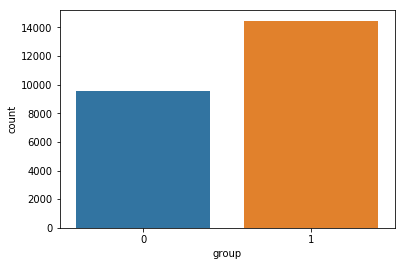

In [8]:
sns.countplot('group', data=N100_df)

-> 조현병과 성별, 나이, 교육 수준의 상관관계 표시도

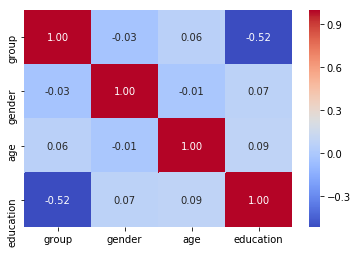

In [9]:
sns.heatmap(
    N100_df[["group","gender","age","education"]].corr(),
    annot=True,
    fmt=".2f",
    cmap="coolwarm"
)

-> 데이터에서 null값(이상값) 분석

In [10]:
N100_df.isnull().sum()

subject        0
trial          0
condition      0
group          0
gender         0
age            0
education      0
Fz_N100      785
FCz_N100     785
Cz_N100      785
FC3_N100     785
FC4_N100     785
C3_N100      785
C4_N100      785
CP3_N100     785
CP4_N100     785
dtype: int64

-> 전체 데이터에서 결측값 퍼센티지

In [11]:
N100_df['Fz_N100'].isnull().sum() / len(N100_df['Fz_N100'])*100

3.272742433085967

-> 결측값 제거

In [12]:
N100_df = N100_df.dropna(how='any', axis=0)

-> 결측값 제거 후 결과

In [13]:
N100_df.isnull().sum()

subject      0
trial        0
condition    0
group        0
gender       0
age          0
education    0
Fz_N100      0
FCz_N100     0
Cz_N100      0
FC3_N100     0
FC4_N100     0
C3_N100      0
C4_N100      0
CP3_N100     0
CP4_N100     0
dtype: int64

->결측값 제거 후 재분석한 그래프

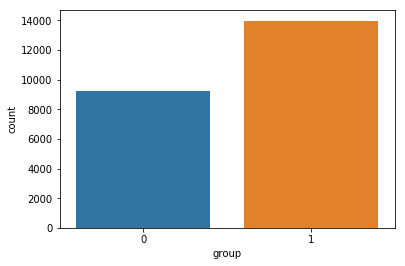

In [14]:
sns.countplot('group', data=N100_df)

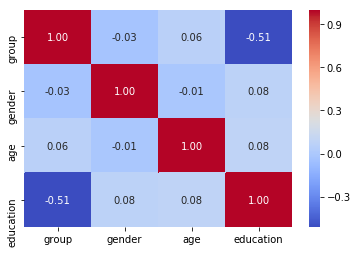

In [15]:
sns.heatmap(
    N100_df[["group","gender","age","education"]].corr(),
    annot=True,
    fmt=".2f",
    cmap="coolwarm"
)

=> 상관관계가 별로 없다고 나오지만 81명의 피험자 수로는 그 신뢰성을 판단하기 어렵다. 따라서 머신러닝 학습 시, 나이, 성별, 학력에 대한 칼럼을 제외 혹은 포함하는 모두를 진행하도록 한다.

=> 결측값을 제거 하고 나서도 데이터에 대한 큰 차이가 없기 때문에 결측값은 무시하도록 한다.

-> 바이올린형 그래프로 본 성별-조현병, 나이-조현병의 상관관계

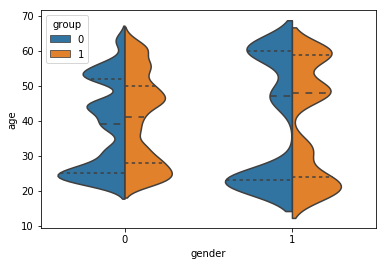

In [16]:
sns.violinplot('gender', 'age', hue='group', data=N100_df, split=True, inner="quartile")

-> 바이올린형 그래프로 본 성별-조현병과 학력-조현병의 상관관계

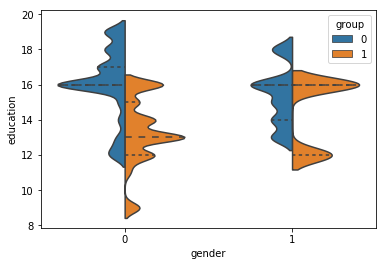

In [17]:
sns.violinplot('gender', 'education', hue='group', data=N100_df, split=True, inner="quartile")

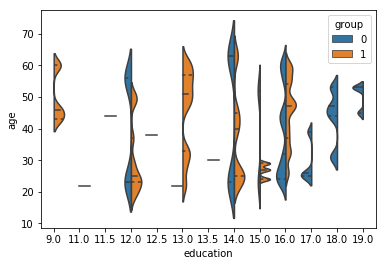

In [18]:
##이 그래프는 필요 없을 것 같음..
sns.violinplot('education','age', hue='group', data=N100_df, split=True, inner="quartile")

-> 나이와 학력에 따른 조현병 환자 및 건강인의 분포도 (일단 고르게 분포되어 있는 산포도를 보임)

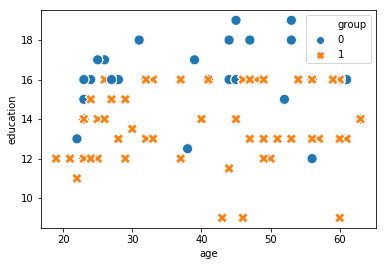

In [19]:
sns.scatterplot(x='age', y='education', hue='group', style='group', s=100, data=N100_df)
plt.show()

머신 러닝 5가지 모델 학습

In [20]:
from pprint import pprint
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc

-> 데이터 분리: X-age, gender, education, channels / Y-group(조현병, 건강인) 칼럼 전체

In [21]:
col_names = N100_df.columns.values
X = N100_df[col_names[4:]]
Y = N100_df[col_names[3]]

In [22]:
X.head(5)

,gender,age,education,Fz_N100,FCz_N100,Cz_N100,FC3_N100,FC4_N100,C3_N100,C4_N100,CP3_N100,CP4_N100
0,0,44,16.0,-9.761338,-11.545219,-16.775214,-3.576595,-11.745167,-0.895419,-16.679205,-5.854429,-14.473143
1,0,44,16.0,8.717519,11.462619,7.979110,9.429738,6.912862,6.242343,4.690100,2.795200,1.938529
2,0,44,16.0,-4.027286,-3.992038,-1.104119,-3.319471,0.321314,0.419538,0.030619,2.828195,2.731533
3,0,44,16.0,0.394095,-0.663186,-1.372871,3.974643,-1.613667,2.376024,-1.504500,2.945000,-1.082224
4,0,44,16.0,-9.368090,-12.029829,-10.280100,-7.846471,-8.170986,-10.192229,-6.907095,-14.041000,-9.666710


In [23]:
Y.head(5)

0    0
1    0
2    0
3    0
4    0
Name: group, dtype: int64

->train, test data set 분리

In [24]:
def train_val_test_split(X, Y, test_size=0.3, random_state=123):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, 
                                                        test_size=test_size, 
                                                        random_state=random_state)
   
    return X_train, X_test, Y_train, Y_test

In [25]:
X_train, X_test, Y_train, Y_test = train_val_test_split(X, Y,
                                                                      test_size=0.3,
                                                                      random_state=123)

In [26]:
print(X_train.shape)
print(X_test.shape)

(16240, 12)
(6961, 12)


1. Logistic Regression을 위한 다양한 가중치 (cross validation적용 전)

In [27]:
penalty_set = ['l1', 'l2']
C_set = [0.0001, 0.001, 0.01, 0.1, 1, 10, 1e2, 1e3, 1e4, 1e5, 1e6]

In [28]:
result = []
for penalty in penalty_set:
    for C in C_set:
        model = LogisticRegression(penalty=penalty, C=C, class_weight='balanced')
        model = model.fit(X_train, Y_train)
#         Y_val_score = model.decision_function(X_val)
        Y_test_score = model.predict_proba(X_test)[:, 1]
        fpr, tpr, _ = roc_curve(Y_test, Y_test_score)
        result.append((model, penalty, C, auc(fpr, tpr)))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

-> 회귀 분석 결과를 정렬 후, 최상의 정확도를 갖는 모델 찾기

In [29]:
logreg_result = sorted(result, key=lambda x: x[3], reverse=True)

In [30]:
best_logreg_result = logreg_result[0]
print(best_logreg_result)

(LogisticRegression(C=10, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='warn', tol=0.0001, verbose=0, warm_start=False), 'l2', 10, 0.8208967739544631)


-> eeg channel training

In [31]:
X_eeg = N100_df[col_names[7:]]
Y_eeg = N100_df[col_names[3]]

In [32]:
X_eeg.head(5)

,Fz_N100,FCz_N100,Cz_N100,FC3_N100,FC4_N100,C3_N100,C4_N100,CP3_N100,CP4_N100
0,-9.761338,-11.545219,-16.775214,-3.576595,-11.745167,-0.895419,-16.679205,-5.854429,-14.473143
1,8.717519,11.462619,7.979110,9.429738,6.912862,6.242343,4.690100,2.795200,1.938529
2,-4.027286,-3.992038,-1.104119,-3.319471,0.321314,0.419538,0.030619,2.828195,2.731533
3,0.394095,-0.663186,-1.372871,3.974643,-1.613667,2.376024,-1.504500,2.945000,-1.082224
4,-9.368090,-12.029829,-10.280100,-7.846471,-8.170986,-10.192229,-6.907095,-14.041000,-9.666710


In [33]:
X_eeg_train, X_eeg_test, Y_eeg_train, Y_eeg_test = train_val_test_split(X_eeg, Y_eeg,
                                                                      
                                                                      test_size=0.2,
                                                                      random_state=123)

In [34]:
result = []
for penalty in penalty_set:
    for C in C_set:
        model = LogisticRegression(penalty=penalty, C=C, class_weight='balanced')
        model = model.fit(X_eeg_train, Y_eeg_train)
#         Y_val_score = model.decision_function(X_val)
        Y_test_score = model.predict_proba(X_eeg_test)[:, 1]
        fpr, tpr, _ = roc_curve(Y_eeg_test, Y_test_score)
        result.append((model, penalty, C, auc(fpr, tpr)))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

In [35]:
logreg_result = sorted(result, key=lambda x: x[3], reverse=True)

In [36]:
best_logreg_result = logreg_result[0]
print(best_logreg_result)

(LogisticRegression(C=0.01, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l1', random_state=None,
          solver='warn', tol=0.0001, verbose=0, warm_start=False), 'l1', 0.01, 0.5426203768922888)


-> condition별 데이터 분리

In [37]:
X_condition = N100_df[col_names[0:]]
Y_condition = N100_df[col_names[0:4]]

In [38]:
X_condition.head()

,subject,trial,condition,group,gender,age,education,Fz_N100,FCz_N100,Cz_N100,FC3_N100,FC4_N100,C3_N100,C4_N100,CP3_N100,CP4_N100
0,1,1,1,0,0,44,16.0,-9.761338,-11.545219,-16.775214,-3.576595,-11.745167,-0.895419,-16.679205,-5.854429,-14.473143
1,1,2,1,0,0,44,16.0,8.717519,11.462619,7.979110,9.429738,6.912862,6.242343,4.690100,2.795200,1.938529
2,1,3,1,0,0,44,16.0,-4.027286,-3.992038,-1.104119,-3.319471,0.321314,0.419538,0.030619,2.828195,2.731533
3,1,4,1,0,0,44,16.0,0.394095,-0.663186,-1.372871,3.974643,-1.613667,2.376024,-1.504500,2.945000,-1.082224
4,1,5,1,0,0,44,16.0,-9.368090,-12.029829,-10.280100,-7.846471,-8.170986,-10.192229,-6.907095,-14.041000,-9.666710


In [39]:
Y_condition.head()

,subject,trial,condition,group
0,1,1,1,0
1,1,2,1,0
2,1,3,1,0
3,1,4,1,0
4,1,5,1,0


-> Y_condition의 필요 없는 column 제거 후, condition별 분리

In [40]:
Y_condition=Y_condition.drop(['subject','trial'],axis=1)
Y_condition.head()

,condition,group
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [41]:
Y_condition1=Y_condition[Y_condition['condition']==1]
Y_condition1.head(101)

,condition,group
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
5,1,0
6,1,0
7,1,0
8,1,0
9,1,0


In [42]:
Y_condition1=Y_condition1.drop('condition', axis=1)
Y_condition1.head()

,group
0,0
1,0
2,0
3,0
4,0


In [43]:
Y_condition2=Y_condition[Y_condition['condition']==2]
Y_condition2.head(101)

,condition,group
100,2,0
101,2,0
103,2,0
104,2,0
105,2,0
106,2,0
107,2,0
108,2,0
109,2,0
110,2,0


In [44]:
Y_condition2=Y_condition2.drop('condition', axis=1)
Y_condition2.head()

,group
100,0
101,0
103,0
104,0
105,0


In [45]:
Y_condition3=Y_condition[Y_condition['condition']==3]
Y_condition3.head(101)

,condition,group
199,3,0
200,3,0
201,3,0
202,3,0
203,3,0
204,3,0
205,3,0
206,3,0
207,3,0
209,3,0


In [46]:
Y_condition3=Y_condition3.drop('condition', axis=1)
Y_condition3.head()

,group
199,0
200,0
201,0
202,0
203,0


-> X_condition의 결과값 칼럼 제거

In [47]:
X_condition=X_condition.drop('group', axis=1)
X_condition.head()

,subject,trial,condition,gender,age,education,Fz_N100,FCz_N100,Cz_N100,FC3_N100,FC4_N100,C3_N100,C4_N100,CP3_N100,CP4_N100
0,1,1,1,0,44,16.0,-9.761338,-11.545219,-16.775214,-3.576595,-11.745167,-0.895419,-16.679205,-5.854429,-14.473143
1,1,2,1,0,44,16.0,8.717519,11.462619,7.979110,9.429738,6.912862,6.242343,4.690100,2.795200,1.938529
2,1,3,1,0,44,16.0,-4.027286,-3.992038,-1.104119,-3.319471,0.321314,0.419538,0.030619,2.828195,2.731533
3,1,4,1,0,44,16.0,0.394095,-0.663186,-1.372871,3.974643,-1.613667,2.376024,-1.504500,2.945000,-1.082224
4,1,5,1,0,44,16.0,-9.368090,-12.029829,-10.280100,-7.846471,-8.170986,-10.192229,-6.907095,-14.041000,-9.666710


-> 연관성 없는 칼럼 제거

In [48]:
X_condition=X_condition.drop(['gender','age','education','subject','trial'],axis=1)
X_condition.head()

,condition,Fz_N100,FCz_N100,Cz_N100,FC3_N100,FC4_N100,C3_N100,C4_N100,CP3_N100,CP4_N100
0,1,-9.761338,-11.545219,-16.775214,-3.576595,-11.745167,-0.895419,-16.679205,-5.854429,-14.473143
1,1,8.717519,11.462619,7.979110,9.429738,6.912862,6.242343,4.690100,2.795200,1.938529
2,1,-4.027286,-3.992038,-1.104119,-3.319471,0.321314,0.419538,0.030619,2.828195,2.731533
3,1,0.394095,-0.663186,-1.372871,3.974643,-1.613667,2.376024,-1.504500,2.945000,-1.082224
4,1,-9.368090,-12.029829,-10.280100,-7.846471,-8.170986,-10.192229,-6.907095,-14.041000,-9.666710


In [49]:
X_condition1=X_condition[X_condition['condition']==1]
X_condition1.head(101)

,condition,Fz_N100,FCz_N100,Cz_N100,FC3_N100,FC4_N100,C3_N100,C4_N100,CP3_N100,CP4_N100
0,1,-9.761338,-11.545219,-16.775214,-3.576595,-11.745167,-0.895419,-16.679205,-5.854429,-14.473143
1,1,8.717519,11.462619,7.979110,9.429738,6.912862,6.242343,4.690100,2.795200,1.938529
2,1,-4.027286,-3.992038,-1.104119,-3.319471,0.321314,0.419538,0.030619,2.828195,2.731533
3,1,0.394095,-0.663186,-1.372871,3.974643,-1.613667,2.376024,-1.504500,2.945000,-1.082224
4,1,-9.368090,-12.029829,-10.280100,-7.846471,-8.170986,-10.192229,-6.907095,-14.041000,-9.666710
5,1,-10.790257,-10.572367,-14.636533,-9.880271,-15.229224,-14.060162,-14.101090,-15.782033,-12.055395
6,1,5.616595,9.261605,11.472643,5.892076,3.369305,13.736567,5.326267,11.242681,6.140795
7,1,12.262348,14.245062,16.989962,10.314271,9.561067,9.339833,12.025652,7.889762,11.902900
8,1,-0.596852,-1.241681,-3.727729,8.685595,-4.913276,6.423724,-3.755538,2.639981,-4.314110
9,1,-6.015471,-7.863443,-9.716157,-6.245338,-5.074048,-1.253329,-4.245752,-0.591100,-5.665014


In [50]:
X_condition2=X_condition[X_condition['condition']==2]
X_condition2.head(101)

,condition,Fz_N100,FCz_N100,Cz_N100,FC3_N100,FC4_N100,C3_N100,C4_N100,CP3_N100,CP4_N100
100,2,-16.716552,-20.971295,-20.478290,-10.182510,-19.729390,-17.714986,-17.048510,-10.823119,-18.070057
101,2,-3.722819,0.513381,5.512324,-6.093929,-3.810562,-0.303200,-2.394881,0.987876,1.415952
103,2,-8.247662,-9.755552,-10.301010,-4.977605,-2.362848,-12.136810,-2.110810,-11.478605,-4.584295
104,2,-8.027805,-7.270267,-6.318910,-13.784110,-3.382119,-10.864186,-2.816748,-14.083590,-1.270076
105,2,-6.368943,-8.376862,-10.965705,-16.191648,-9.046586,-12.507938,-7.621748,-7.771948,-6.955390
106,2,-23.887971,-25.746367,-26.506876,-17.793667,-18.992681,-23.638824,-19.264057,-19.958895,-19.158962
107,2,-11.405690,-11.201986,-12.185310,-11.642905,-15.096833,-14.883738,-14.107133,-12.014000,-10.282324
108,2,-2.690552,0.353181,-0.090357,0.199086,-5.209033,-0.987038,-3.627448,-2.303571,-2.124890
109,2,11.067590,11.486171,7.105162,9.595990,7.694167,8.186790,2.874810,7.473910,5.128400
110,2,2.553186,-0.695638,-7.052710,3.339743,-0.394033,2.220914,-0.928914,1.195905,-3.296943


In [51]:
X_condition3=X_condition[X_condition['condition']==3]
X_condition3.head(101)

,condition,Fz_N100,FCz_N100,Cz_N100,FC3_N100,FC4_N100,C3_N100,C4_N100,CP3_N100,CP4_N100
199,3,7.927462,10.191724,14.238219,6.325543,9.125038,6.551529,8.492952,3.189105,6.345057
200,3,1.525724,3.350157,4.831110,5.704062,1.612810,4.315371,2.633157,-3.105952,0.145895
201,3,8.472619,12.202405,15.034671,6.784305,12.998590,6.405124,12.207514,7.003910,10.438271
202,3,6.251105,11.988548,18.587343,13.116338,8.820376,12.936419,13.451738,15.863624,12.711000
203,3,4.445529,1.646410,-2.357400,6.164052,-2.160619,1.599310,-5.571371,1.012348,-6.457757
204,3,1.720248,0.753138,2.764776,-0.042848,3.739200,-0.610029,4.536124,1.817062,3.933505
205,3,-4.061529,-5.716195,-8.323124,-2.957110,-7.120652,-4.070543,-6.590886,-1.491000,-5.716700
206,3,5.132795,5.039795,8.241124,6.452662,7.013976,3.528300,7.192176,4.883643,7.636348
207,3,0.083867,0.035476,0.798010,-2.412929,-2.835867,1.826395,-2.489719,-3.747086,-3.580700
209,3,11.660967,12.732457,13.322486,9.178481,14.236833,10.541295,13.371943,9.941881,12.263457


-> condition1에 따른 dataset 분리및 학습

In [52]:
X_condition1_train, X_condition1_test, Y_condition1_train, Y_condition1_test = train_val_test_split(X_condition1, Y_condition1,
                                                                      
                                                                      test_size=0.2,
                                                                      random_state=123)

In [53]:
print(X_condition1_train.shape)
print(X_condition1_test.shape)
print(Y_condition1_train.shape)
print(Y_condition1_test.shape)

(6268, 10)
(1568, 10)
(6268, 1)
(1568, 1)


In [54]:
result = []
for penalty in penalty_set:
    for C in C_set:
        model = LogisticRegression(penalty=penalty, C=C, class_weight='balanced')
        model = model.fit(X_condition1_train, Y_condition1_train)
#         Y_val_score = model.decision_function(X_val)
        Y_test_score = model.predict_proba(X_condition1_test)[:, 1]
        fpr, tpr, _ = roc_curve(Y_condition1_test, Y_test_score)
        result.append((model, penalty, C, auc(fpr, tpr)))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [55]:
logreg_result = sorted(result, key=lambda x: x[3], reverse=True)

In [56]:
best_logreg_result = logreg_result[0]
print(best_logreg_result)

(LogisticRegression(C=0.0001, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='warn', tol=0.0001, verbose=0, warm_start=False), 'l2', 0.0001, 0.5619894462719298)


-> condition2에 따른 dataset 분리및 학습

In [57]:
X_condition2_train, X_condition2_test, Y_condition2_train, Y_condition2_test = train_val_test_split(X_condition2, Y_condition2,
                                                                      
                                                                      test_size=0.2,
                                                                      random_state=123)

In [58]:
result = []
for penalty in penalty_set:
    for C in C_set:
        model = LogisticRegression(penalty=penalty, C=C, class_weight='balanced')
        model = model.fit(X_condition2_train, Y_condition2_train)
#         Y_val_score = model.decision_function(X_val)
        Y_test_score = model.predict_proba(X_condition2_test)[:, 1]
        fpr, tpr, _ = roc_curve(Y_condition2_test, Y_test_score)
        result.append((model, penalty, C, auc(fpr, tpr)))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\v

In [59]:
logreg_result = sorted(result, key=lambda x: x[3], reverse=True)

In [60]:
best_logreg_result = logreg_result[0]
print(best_logreg_result)

(LogisticRegression(C=10, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='warn', tol=0.0001, verbose=0, warm_start=False), 'l2', 10, 0.520622976321835)


-> condition3에 따른 dataset 분리및 학습

In [61]:
X_condition3_train, X_condition3_test, Y_condition3_train, Y_condition3_test = train_val_test_split(X_condition3, Y_condition3,
                                                                      
                                                                      test_size=0.2,
                                                                      random_state=123)

In [62]:
result = []
for penalty in penalty_set:
    for C in C_set:
        model = LogisticRegression(penalty=penalty, C=C, class_weight='balanced')
        model = model.fit(X_condition3_train, Y_condition3_train)
#         Y_val_score = model.decision_function(X_val)
        Y_test_score = model.predict_proba(X_condition3_test)[:, 1]
        fpr, tpr, _ = roc_curve(Y_condition3_test, Y_test_score)
        result.append((model, penalty, C, auc(fpr, tpr)))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\v

In [63]:
logreg_result = sorted(result, key=lambda x: x[3], reverse=True)

In [64]:
best_logreg_result = logreg_result[0]
print(best_logreg_result)

(LogisticRegression(C=0.01, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l1', random_state=None,
          solver='warn', tol=0.0001, verbose=0, warm_start=False), 'l1', 0.01, 0.5498568810147362)


-> 임의로 분리한 train, test 데이터 셋에 대한 최상의 모델 찾기는 그 신뢰성을 보장하기 어렵기 때문에, 반복적으로 train, test로 데이터를 나누어 검증하는 교차 검증을 도입하여 정확도가 높은 최상의 모델을 찾아야 한다.

In [65]:
from sklearn.model_selection import cross_val_score

-> 30번의 교차 검증을 진행하여 모델에 대한 정확도 측정

In [66]:
cross_val_score(LogisticRegression(), X_condition3, Y_condition3, scoring='accuracy',cv=30)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\v

array([0.5984556 , 0.59459459, 0.5984556 , 0.58527132, 0.59302326,
       0.59689922, 0.59689922, 0.58139535, 0.57364341, 0.59302326,
       0.59689922, 0.59689922, 0.59689922, 0.59689922, 0.60077519,
       0.60077519, 0.59302326, 0.58914729, 0.59689922, 0.59689922,
       0.59689922, 0.61089494, 0.59922179, 0.57587549, 0.57976654,
       0.58754864, 0.61478599, 0.59922179, 0.56809339, 0.61089494])

In [67]:
cross_val_score(LogisticRegression(), X_condition1, Y_condition1, scoring='accuracy',cv=30)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_

array([0.60305344, 0.59160305, 0.60305344, 0.58015267, 0.60305344,
       0.59923664, 0.60305344, 0.60305344, 0.61068702, 0.59923664,
       0.60305344, 0.60305344, 0.60305344, 0.61068702, 0.60687023,
       0.59160305, 0.60305344, 0.60305344, 0.60384615, 0.60384615,
       0.60384615, 0.60769231, 0.6       , 0.58846154, 0.58461538,
       0.59615385, 0.60384615, 0.56923077, 0.6       , 0.61538462])

In [68]:
cross_val_score(LogisticRegression(), X_condition2, Y_condition2, scoring='accuracy',cv=30)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\v

array([0.58984375, 0.59375   , 0.60546875, 0.578125  , 0.59607843,
       0.6       , 0.60392157, 0.5984252 , 0.60629921, 0.61417323,
       0.6023622 , 0.6023622 , 0.6023622 , 0.61417323, 0.60629921,
       0.59448819, 0.60629921, 0.61023622, 0.60629921, 0.5984252 ,
       0.61023622, 0.61023622, 0.6023622 , 0.60629921, 0.55511811,
       0.55905512, 0.5984252 , 0.60629921, 0.6023622 , 0.64566929])

In [69]:
cross_val_score(LogisticRegression(), X_eeg, Y_eeg, scoring='accuracy',cv=30)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

array([0.60206718, 0.60077519, 0.60206718, 0.58656331, 0.59819121,
       0.60206718, 0.60206718, 0.60206718, 0.60465116, 0.60594315,
       0.60206718, 0.60077519, 0.60077519, 0.60077519, 0.60465116,
       0.59431525, 0.60284605, 0.60413972, 0.60284605, 0.60284605,
       0.60284605, 0.60413972, 0.60284605, 0.59249677, 0.57956016,
       0.59067358, 0.60492228, 0.5984456 , 0.60103627, 0.60880829])

2. K-nearest neighbor classifier = KNN

-> weights:‘uniform’ : uniform weights. All points in each neighborhood are weighted equally.

In [70]:
weights_set = ['uniform', 'distance']
n_neighbors_set = [1, 3, 5, 7, 9, 11, 13, 15]

In [71]:
result = []
for weights in weights_set:
    for n_neighbors in n_neighbors_set:
        model = KNeighborsClassifier(n_neighbors=n_neighbors, weights=weights)
        model = model.fit(X_condition1_train, Y_condition1_train)
        Y_test_score = model.predict_proba(X_condition1_test)[:, 1]
        fpr, tpr, _ = roc_curve(Y_condition1_test, Y_test_score)
        result.append((model, weights, n_neighbors, auc(fpr, tpr)))        

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversi

In [72]:
knn_result = sorted(result, key=lambda x: x[3], reverse=True)

In [73]:
best_knn_result = knn_result[0]
print(best_knn_result)

(KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=7, p=2,
           weights='uniform'), 'uniform', 7, 0.5474403782894738)


In [74]:
cross_val_score(KNeighborsClassifier(), X_condition1, Y_condition1, scoring='accuracy',cv=30)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y

array([0.53816794, 0.61832061, 0.54198473, 0.52671756, 0.53435115,
       0.57251908, 0.53053435, 0.53435115, 0.53053435, 0.51145038,
       0.52290076, 0.47709924, 0.46564885, 0.54580153, 0.51145038,
       0.54961832, 0.55725191, 0.51145038, 0.53461538, 0.58461538,
       0.52307692, 0.51153846, 0.59615385, 0.61153846, 0.53076923,
       0.51923077, 0.51538462, 0.55384615, 0.53461538, 0.48461538])

In [75]:
cross_val_score(KNeighborsClassifier(), X_eeg, Y_eeg, scoring='accuracy',cv=30)

array([0.52067183, 0.60852713, 0.53359173, 0.54521964, 0.56459948,
       0.53229974, 0.57622739, 0.53359173, 0.53617571, 0.54651163,
       0.52842377, 0.5374677 , 0.53488372, 0.55943152, 0.55813953,
       0.57622739, 0.56274256, 0.52393273, 0.52393273, 0.54204398,
       0.56921087, 0.57956016, 0.5847348 , 0.56662354, 0.55627426,
       0.55181347, 0.46632124, 0.55829016, 0.57124352, 0.5       ])

In [76]:
cross_val_score(KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=7, p=2,
           weights='distance'), X_condition1, Y_condition1, scoring='accuracy',cv=30)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y

array([0.55343511, 0.61450382, 0.51145038, 0.5       , 0.5648855 ,
       0.54580153, 0.54198473, 0.55725191, 0.53435115, 0.51526718,
       0.57251908, 0.50381679, 0.49618321, 0.54961832, 0.55725191,
       0.5648855 , 0.55725191, 0.54580153, 0.51923077, 0.59230769,
       0.52307692, 0.55      , 0.61538462, 0.61153846, 0.53076923,
       0.55384615, 0.5       , 0.54230769, 0.52307692, 0.48461538])

-> 위의 logistic regression보다는 성능이 비슷하거나 조금 떨어짐

3. Naive Bayes clasifier

In [77]:
cross_val_score(GaussianNB(), X_condition1, Y_condition1, scoring='accuracy',cv=30)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

array([0.45801527, 0.62977099, 0.48473282, 0.65267176, 0.49618321,
       0.46183206, 0.50381679, 0.58778626, 0.41984733, 0.45801527,
       0.47709924, 0.5610687 , 0.48854962, 0.39694656, 0.46183206,
       0.59160305, 0.64122137, 0.46946565, 0.39230769, 0.46923077,
       0.46153846, 0.51923077, 0.49230769, 0.41538462, 0.51153846,
       0.55769231, 0.31923077, 0.39230769, 0.51153846, 0.31923077])

-> 편차가 심함 (0.65가 있는 반면 0.31도 있음)

4. Decision Tree

In [78]:
cross_val_score(DecisionTreeClassifier(), X_condition1, Y_condition1, scoring='accuracy',cv=30)

array([0.49618321, 0.53816794, 0.49236641, 0.53435115, 0.49236641,
       0.53435115, 0.48091603, 0.52290076, 0.48473282, 0.47709924,
       0.51526718, 0.48473282, 0.51145038, 0.48473282, 0.46564885,
       0.59160305, 0.53816794, 0.55725191, 0.57692308, 0.5       ,
       0.56153846, 0.50769231, 0.48461538, 0.57692308, 0.51538462,
       0.51153846, 0.47692308, 0.53461538, 0.54230769, 0.51153846])

-> 위의 두 모델보다 성능이 떨어짐

5. RandomForest Classifier

In [79]:
cross_val_score(RandomForestClassifier(), X_condition1, Y_condition1, scoring='accuracy',cv=30)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  esti

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  esti

array([0.51526718, 0.51908397, 0.51526718, 0.51908397, 0.50763359,
       0.58015267, 0.51526718, 0.49236641, 0.48854962, 0.53053435,
       0.55725191, 0.50381679, 0.46564885, 0.55343511, 0.54961832,
       0.5       , 0.57251908, 0.52290076, 0.47692308, 0.53846154,
       0.54615385, 0.54615385, 0.54230769, 0.54230769, 0.45384615,
       0.46923077, 0.52692308, 0.56153846, 0.53461538, 0.50384615])

-> 위의 두 모델보다 성능이 떨어짐

<반복 교차 검증을 통한 모델의 최상 파라미터 찾기>

In [80]:
from sklearn.model_selection import RepeatedKFold

In [299]:
rkfold = RepeatedKFold(n_splits=10, n_repeats=10, random_state=42)
cross_val_score(LogisticRegression(), X_condition1, Y_condition1, scoring='accuracy',cv=rkfold)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\v

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\v

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\v

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\v

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\v

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\v

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\v

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\v

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\v

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\v

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\v

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\v

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\v

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\v

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\v

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\v

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\v

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\v

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\v

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\v

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\v

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\v

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\v

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\v

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\v

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\v

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\v

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\v

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\v

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\v

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\v

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\v

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\v

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\v

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\v

array([0.58778626, 0.60687023, 0.60305344, 0.58778626, 0.61068702,
       0.54198473, 0.57088123, 0.56321839, 0.60536398, 0.62068966,
       0.62835249, 0.60153257, 0.51340996, 0.61302682, 0.67049808,
       0.63218391, 0.60536398, 0.5862069 , 0.59770115, 0.59386973,
       0.65517241, 0.51724138, 0.57854406, 0.62835249, 0.63601533,
       0.5862069 , 0.59386973, 0.64750958, 0.60153257, 0.62452107,
       0.59923664, 0.63358779, 0.61068702, 0.6259542 , 0.59923664,
       0.59541985, 0.60536398, 0.56704981, 0.56704981, 0.61302682,
       0.59003831, 0.5862069 , 0.5862069 , 0.66666667, 0.61302682,
       0.55938697, 0.5440613 , 0.5862069 , 0.63601533, 0.57854406,
       0.5862069 , 0.62068966, 0.60536398, 0.66283525, 0.56704981,
       0.61685824, 0.56321839, 0.59770115, 0.60153257, 0.62068966,
       0.60687023, 0.6221374 , 0.64503817, 0.59923664, 0.61832061,
       0.61450382, 0.56704981, 0.56321839, 0.59770115, 0.61685824,
       0.59770115, 0.62068966, 0.63218391, 0.57854406, 0.61685

-> condition1에 대해서 최고 0.67까지 보임